   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
(20640, 9)
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%  

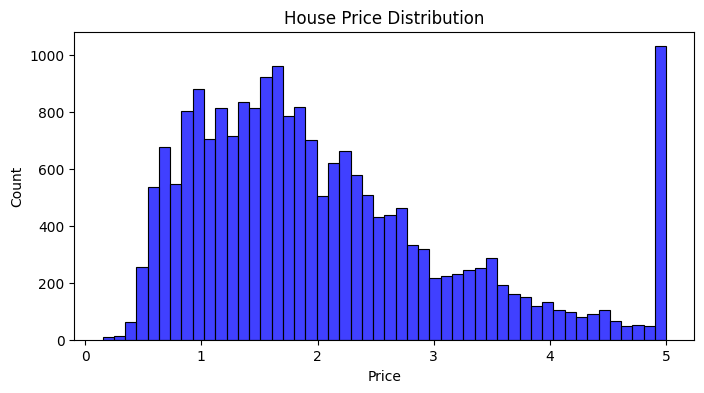

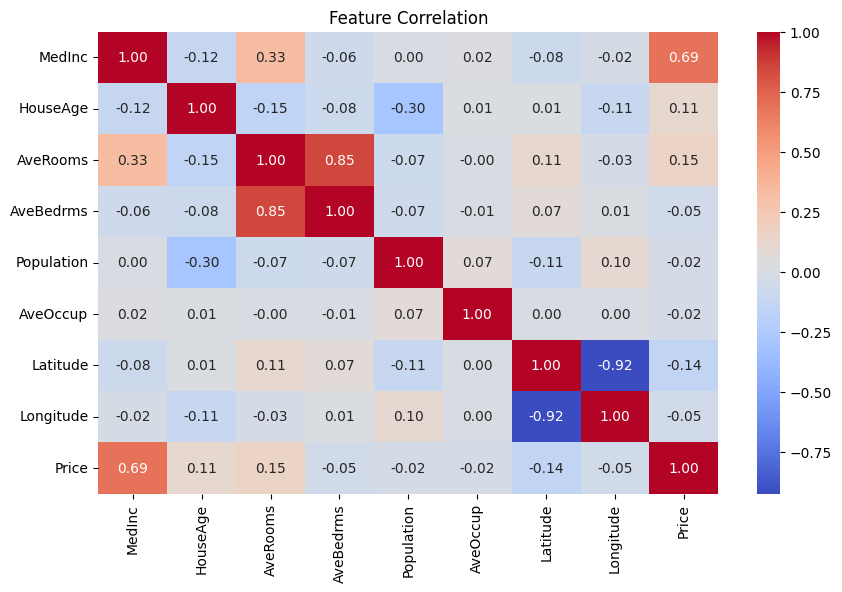

Training samples: 16512
Testing samples: 4128

--- Linear Regression ---
R² Score: 0.58
RMSE: 0.75

--- Random Forest ---
R² Score: 0.81
RMSE: 0.51


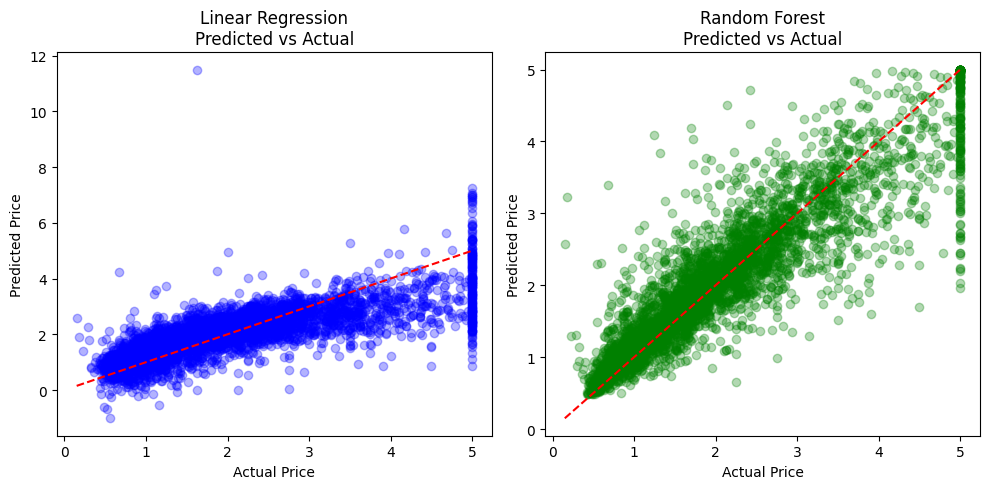

In [3]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Step 2: Load Dataset
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['Price'] = housing.target

print(df.head())
print(df.shape)
print(df.describe())

# Step 3: Explore the Data
print("Missing values:")
print(df.isnull().sum())

print("\nPrice distribution:")
plt.figure(figsize=(8,4))
sns.histplot(df['Price'], bins=50, color='blue')
plt.title('House Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation')
plt.show()

# Step 4: Prepare Data
X = df.drop('Price', axis=1)
y = df['Price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train TWO models and compare
# Model 1 - Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

# Model 2 - Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

# Step 6: Evaluate both models
print("\n--- Linear Regression ---")
print(f"R² Score: {r2_score(y_test, lr_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, lr_pred)):.2f}")

print("\n--- Random Forest ---")
print(f"R² Score: {r2_score(y_test, rf_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, rf_pred)):.2f}")

# Step 7: Visualize predictions vs actual
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(y_test, lr_pred, alpha=0.3, color='blue')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.title('Linear Regression\nPredicted vs Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.subplot(1,2,2)
plt.scatter(y_test, rf_pred, alpha=0.3, color='green')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.title('Random Forest\nPredicted vs Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.tight_layout()
plt.show()